# i. Introduction
---
**Creator  : Serina Roihaanah Mulawati**  

Program ini dibuat untuk memprediksi apakah seorang customer hotel akan melakukan pembatalan dalam pemesanan atau tidak.

---


# ii. Problem Background

### ii. a. Prologue

Program ini dibuat untuk membantu tim marketing di Hotel XYZ dalam memprediksi kemungkinan pembatalan pemesanan oleh pelanggan. Peneliti akan menggunakan analisis data untuk mengidentifikasi faktor-faktor yang mempengaruhi keputusan pelanggan untuk membatalkan pemesanan mereka. Hasil dari analisis ini akan memberikan rekomendasi bisnis yang dapat ditindaklanjuti untuk mengurangi tingkat pembatalan, serta informasi tambahan dari analisis eksploratif (EDA) yang dapat meningkatkan strategi pemasaran dan retensi pelanggan.

### ii. b. Business Understanding

Untuk mengidentifikasi kasus yang dimiliki, maka dirancang **SMART Framework** dengan rincian sebagai berikut:

- **SPECIFIC**:  
  Berfokus pada memprediksi kemungkinan pembatalan pemesanan pelanggan menggunakan data pemesanan hotel yang telah diperoleh untuk meningkatkan retensi pelanggan.

- **MEASURABLE**:  
  Model yang berhasil harus mampu memprediksi dengan akurasi minimal 75% pada data pengujian.

- **ACHIEVABLE**:  
  Menganalisis faktor-faktor yang mempengaruhi pembatalan pemesanan dan membuat prediksi yang akurat.

- **RELEVANT**:  
  Dengan memberikan wawasan yang mendalam tentang penyebab pembatalan, proyek ini bertujuan untuk meningkatkan pengalaman pelanggan dan mengurangi tingkat pembatalan, sehingga meningkatkan pendapatan hotel.

- **TIME-BOUND**:  
  Proyek ini bertujuan untuk memberikan hasil analisis dan rekomendasi dalam waktu dua bulan ke depan.

**PROBLEM STATEMENT**  
Target yang ingin dicapai adalah meningkatkan pemahaman tentang faktor-faktor yang menyebabkan pembatalan pemesanan hotel. Hal ini akan dicapai melalui teknik prediksi yang mengidentifikasi pelanggan berisiko tinggi untuk membatalkan pemesanan, sehingga memungkinkan manajemen untuk mengambil langkah-langkah proaktif.

**Objective:**  
Proyek ini bertujuan untuk membantu tim pemasaran dan manajemen hotel dalam memprediksi kemungkinan pembatalan pemesanan. Proyek ini akan mengembangkan model prediktif untuk mengidentifikasi pelanggan yang berisiko tinggi membatalkan pemesanan dan memberikan rekomendasi untuk mengurangi pembatalan, guna mengoptimalkan pendapatan hotel.


### ii. c. Breaking Down the Problem

**Masalah utama:** `Memprediksi kemungkinan pembatalan pemesanan untuk meningkatkan retensi pelanggan di hotel`

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail tentang masalah tersebut.

- Apakah terdapat pola antara pengaruh variabel seperti **lead_time**, **total_of_special_requests**, dan **previous_cancellations** terhadap kemungkinan pembatalan (`is_canceled`)?

- Fitur apa saja yang paling berpengaruh dalam memprediksi kemungkinan pembatalan pemesanan?

- Apa rekomendasi bisnis yang dapat diberikan untuk mengurangi pembatalan berdasarkan hasil analisis terhadap perilaku dan preferensi pelanggan?

- Bagaimana dampak dari prediksi pembatalan ini terhadap strategi pemasaran yang akan dilakukan untuk meningkatkan retensi pelanggan?


# iii. Import Libraries

Bagian ini berfungsi untuk menyimpan library yang akan digunakan dalam mengeksekusi sintaks.

In [1]:
import pandas as pd  # For data manipulation using DataFrames.
import numpy as np  # For numerical operations and array handling.
import matplotlib.pyplot as plt  # For creating visualizations.
import seaborn as sns  # For enhanced statistical data visualization.
import matplotlib.cm as cm  # For color maps in plots.
import folium  # For creating interactive maps.
from folium.plugins import HeatMap  # For adding heatmap functionality to Folium maps.
import plotly.express as px  # For creating interactive plots.

# Scikit-learn imports for machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV  # To split the dataset and perform hyperparameter tuning.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder  # For scaling and encoding features.
from sklearn.cluster import KMeans  # For clustering data into groups.
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression  # For logistic regression model.
from sklearn.neighbors import KNeighborsClassifier  # For K-nearest neighbors classification.
from sklearn.svm import SVC  # For support vector classification.
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification.
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, 
                              VotingClassifier)  # For ensemble methods.
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib  # For saving and loading models.
import warnings  # To manage warning messages.
warnings.filterwarnings('ignore')  # Suppress warning messages.
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer  # To handle outliers by capping extreme values.
from scipy import stats

# Set visualization styles
plt.style.use('fivethirtyeight')  # Set the plotting style.
pd.set_option('display.max_columns', 32)  # Set display options for DataFrames.


# iv. Data Loading

Berikut adalah tabel yang merangkum deskripsi dataset:

| Index | Variable                             | Description                                                                           |
|-------|--------------------------------------|---------------------------------------------------------------------------------------|
| 1     | hotel                                | Type of hotel (Resort Hotel, City Hotel)                                             |
| 2     | is_canceled                          | Reservation cancellation status (0 = not canceled, 1 = canceled)                     |
| 3     | lead_time                            | Number of days between booking and arrival                                           |
| 4     | arrival_date_year                   | Year of arrival                                                                       |
| 5     | arrival_date_month                  | Month of arrival                                                                      |
| 6     | arrival_date_week_number             | Week number of the year for arrival                                                   |
| 7     | arrival_date_day_of_month           | Day of the month of arrival                                                           |
| 8     | stays_in_weekend_nights             | Number of weekend nights (Saturday and Sunday) the guest stayed or booked           |
| 9     | stays_in_week_nights                | Number of week nights the guest stayed or booked                                      |
| 10    | adults                               | Number of adults                                                                       |
| 11    | children                             | Number of children                                                                     |
| 12    | babies                               | Number of babies                                                                       |
| 13    | meal                                 | Type of meal booked (BB, FB, HB, SC, Undefined)                                      |
| 14    | country                              | Country of origin of the guest                                                       |
| 15    | market_segment                       | Market segment designation                                                             |
| 16    | distribution_channel                 | Booking distribution channel                                                           |
| 17    | is_repeated_guest                    | If the guest is a repeat customer (0 = not repeated, 1 = repeated)                   |
| 18    | previous_cancellations               | Number of previous bookings that were canceled by the customer                       |
| 19    | previous_bookings_not_canceled      | Number of previous bookings that were not canceled by the customer                   |
| 20    | reserved_room_type                   | Type of reserved room                                                                 |
| 21    | assigned_room_type                   | Type of assigned room                                                                 |
| 22    | booking_changes                      | Number of changes made to the booking                                                  |
| 23    | deposit_type                         | Type of deposit made (No Deposit, Refundable, Non Refund)                           |
| 24    | agent                                | ID of the travel agent responsible for the booking                                   |
| 25    | company                              | ID of the company responsible for the booking                                         |
| 26    | days_in_waiting_list                | Number of days the booking was in the waiting list                                    |
| 27    | customer_type                        | Type of customer (Transient, Contract, Transient-Party, Group)                      |
| 28    | adr                                  | Average Daily Rate                                                                     |
| 29    | required_car_parking_spaces         | Number of car parking spaces required                                                  |
| 30    | total_of_special_requests            | Number of special requests made                                                       |
| 31    | reservation_status                   | Last reservation status (Check-Out, Canceled, No-Show)                              |
| 32    | reservation_status_date              | Date of the last reservation status                                                    |
| 33    | name                                 | Guest's name                                                                          |
| 34    | email                                | Guest's email address                                                                  |
| 35    | phone-number                         | Guest's phone number                                                                   |
| 36    | credit_card                          | Last four digits of the guest's credit card                                          |

Bagian ini berfungsi untuk melakukan *loading* data yang akan digunakan dalam melakukan analisa.

In [136]:
# dataset
import pandas as pd
df_ori = pd.read_csv("hotel_booking.csv")

# Duplicate dataset
df = df_ori.copy()

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [137]:
# Show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari informasi tersebut terlihat bahwa dalam dataset ini terdapat sebanyak 119390 data dan 36 kolom dengan keterangan sebagai berikut:  

|Tipe data     | Banyak kolom | Kolom |
|------------------------|----- |---|
|Float                 |  4 | `children`, `agent`, `company`, `adr`|
|Integer            | 16 | `is_canceled`, `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `babies`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`|
|Object            | 16 |`hotel`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, `reservation_status_date`, `name`, `email`, `phone-number`, `credit_card`|


# v. Exploratory Data Analysis (EDA)

Bagian ini mencakup dua hal, yaitu pemeriksaan karakteristik data dan deskripsi data secara statistik.

## v.a. Duplicate Checking

Pada bagian ini peneliti akan memeriksa apakah dataset memiliki baris yang terduplikasi atau tidak.

In [138]:
# check duplicate data
df.duplicated().sum()

0

Tidak ada data yang terduplikasi, maka kita bisa lanjutkan ke tahap berikutnya.

## v.b. Missing Value Checking

Pada bagian ini akan dilakukan pemeriksaan terhadap dataset apakah memiliki missing value atau tidak.

In [139]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null[null['Null Values'] > 0]

,Null Values,Percentage Null Values
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


Dari total 36 kolom yang tersedia, dalam kolom `children` terdapat 4 data missing, kolom `country` memiliki 488 data missing, kolom `agent` terdapat 16340 data missing, dan kolom `company` memiliki 112593 data missing. Dengan begitu perlu adanya penanganan dengan metode yang sesuai pada dataset ini. Untuk data dengan persentase kurang dari 5% akan dilakukan penghapusan.

## v.c. Cardinality Checking

Pada bagian ini akan dilakukan pemeriksaan terhadap cardinality untuk kolom kategorikal.

In [140]:
# define categorical columns
cat_cols = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_day_of_month',
    'arrival_date_week_number',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# define numerical columns
num_cols = [col for col in df.columns if col not in cat_cols and col != 'reservation_status_date']

Berikut adalah rincian dari kolom-kolom kategorikal.

In [141]:
# showing unique value from each cat col
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,arrival_date_year,3,"[2015, 2016, 2017]"
3,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
4,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,meal,5,"[BB, FB, HB, SC, Undefined]"
7,country,177,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, ...]"
8,market_segment,8,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Undefined, Aviation]"
9,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"


Terlihat bahwa pada kolom `arrival_date_week_number`, `country`, `agent`, `company`, `name`, `email`, `phone-number`, dan `credit_card` memiliki cardinality yang sangat tinggi. Maka perlu adanya penanganan yang tepat pada kolom-kolom tersebut.

## v.d. Descriptive Statistical Analysis

### v.c.1. Data Distribution

Dalam data ini, kita dapat asumsikan setiap klom dapat dikelompokkan sebagai berikut :

**Numerical** :  
- lead_time
- arrival_date_week_number
- arrival_date_day_of_month
- stays_in_weekend_nights
- stays_in_week_nights
- adults
- children
- babies
- previous_cancellations
- previous_bookings_not_canceled
- booking_changes
- days_in_waiting_list
- adr
- required_car_parking_spaces
- total_of_special_requests

**Categorical** :  
- hotel
- is_canceled
- arrival_date_year
- arrival_date_month
- meal
- country
- market_segment
- distribution_channel
- is_repeated_guest
- reserved_room_type
- assigned_room_type
- deposit_type
- agent
- company
- customer_type
- reservation_status
- name
- email
- phone-number
- credit_card

Berikut adalah pemeriksaan distribusi data dengan histogram dan box-plot.

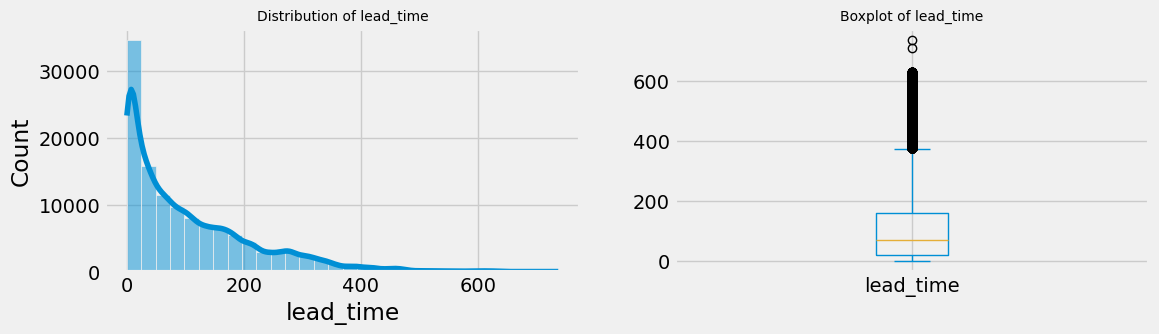

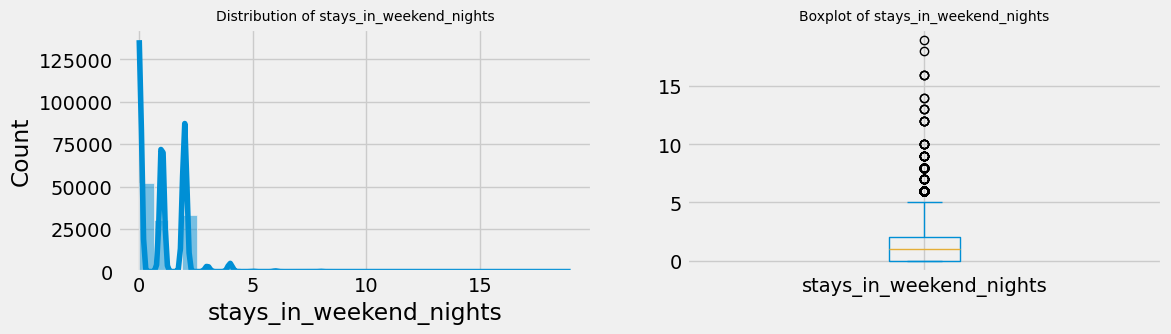

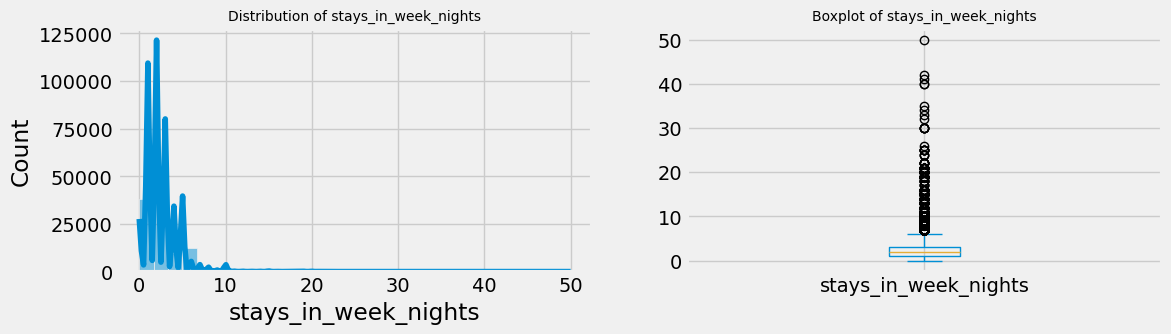

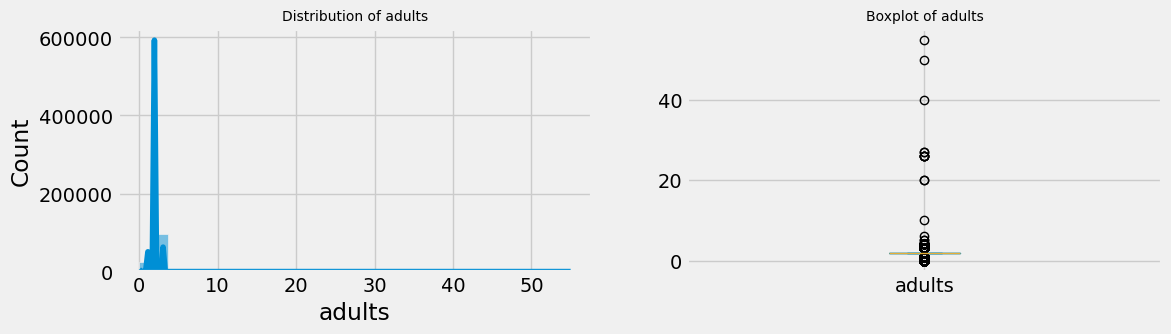

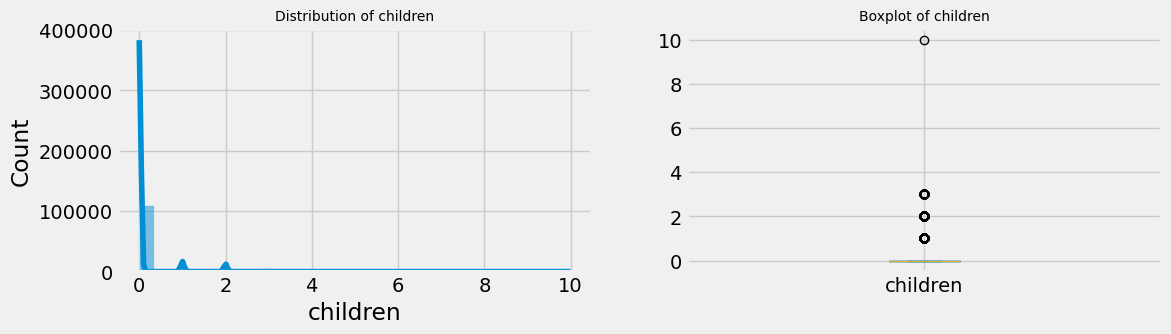

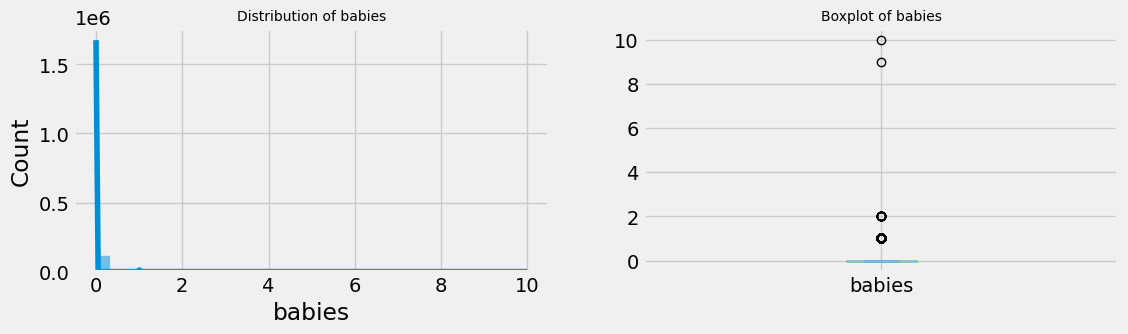

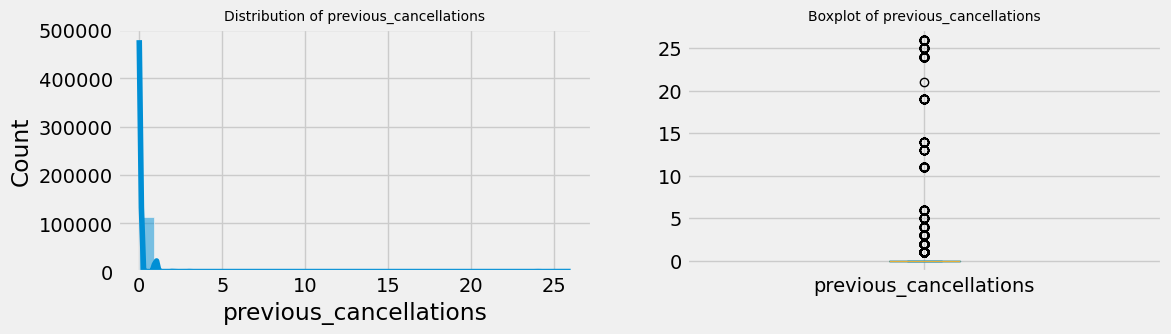

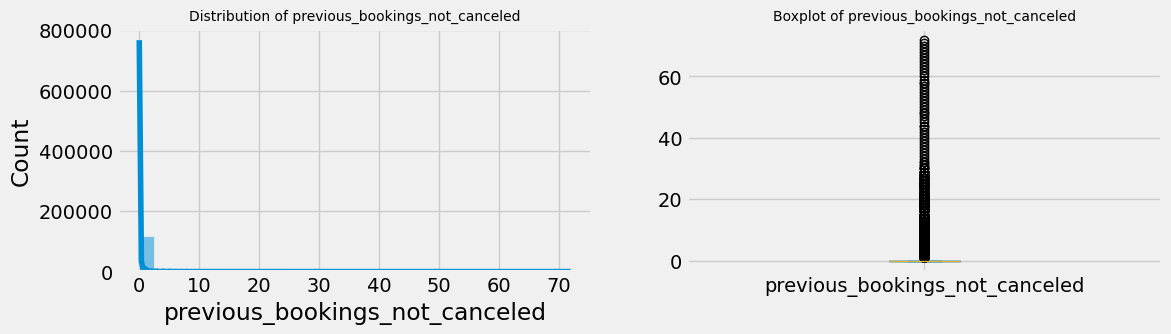

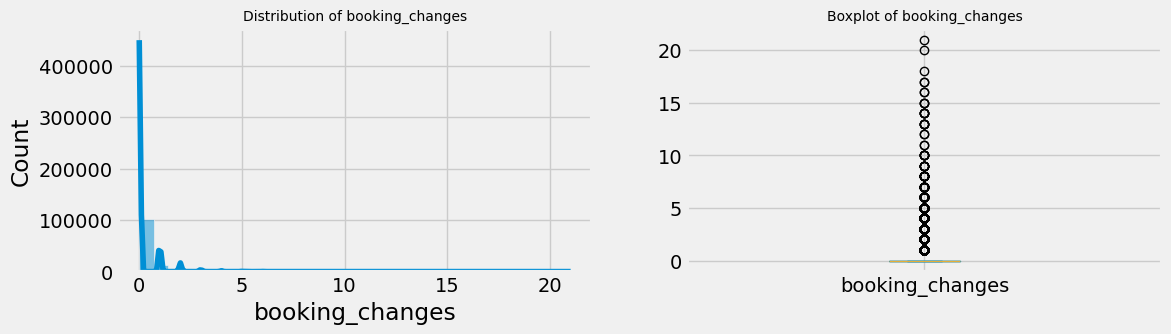

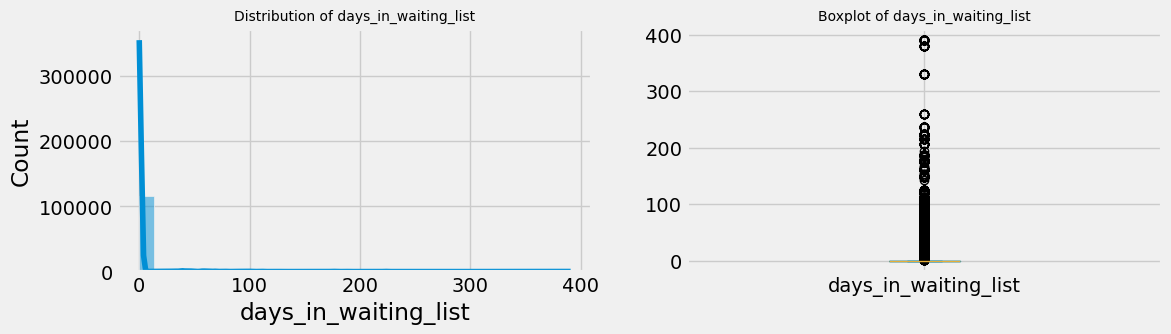

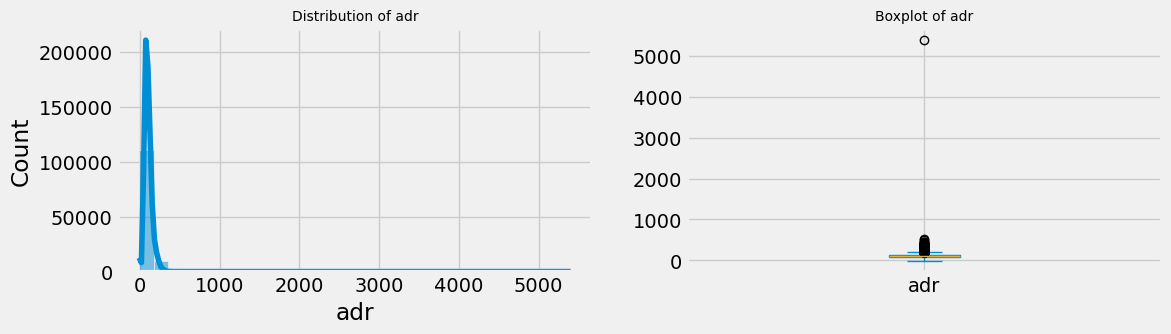

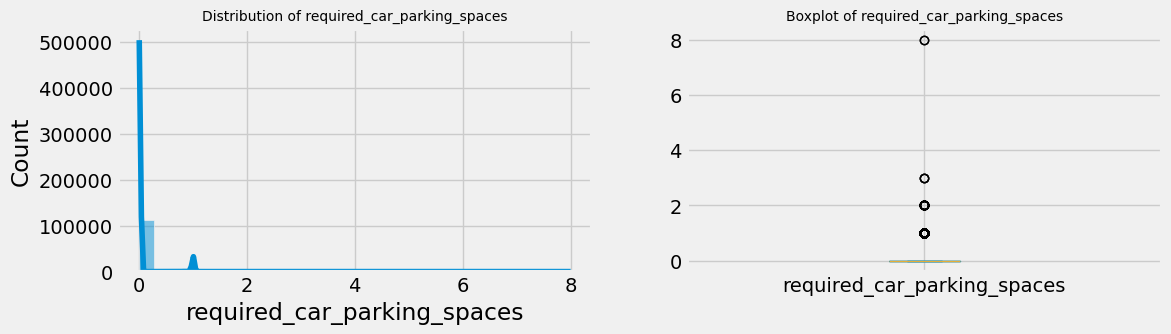

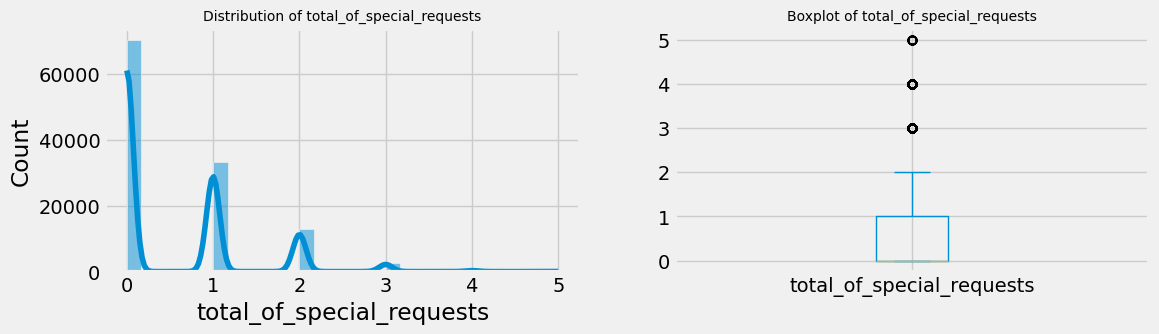

In [142]:
# distribution of numerical columns
for col in df[num_cols]:
    
    # Create a canvas
    plt.figure(figsize=(12, 3))
    
    # Plot histogram for the column
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=10)  # Ubah fontsize sesuai keinginan
    plt.xlabel(f'{col}')
    
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')
    plt.title(f'Boxplot of {col}', fontsize=10)  # Ubah fontsize sesuai keinginan
    
    # Show
    plt.show()


Secara visual, pada seluruh kolom numerik tidak mengindikasikan data berdistribusi normal dan dapat terlihat pula adanya banyak outlier pada data tersebut yang ditunjukkan oleh grafik box-plot.

Selanjutnya, kita akan melihat bagaimana pesebaran data di setiap negara dalam bentuk peta demografi.

In [143]:
# Count the number of guests by country for those not canceled
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()

# Rename columns to 'country' and 'No of guests'
country_wise_guests.columns = ['country', 'No of guests']


In [144]:
# Create a base map using Folium
basemap = folium.Map()

# Create a choropleth map using Plotly Express to visualize the number of guests by country
guests_map = px.choropleth(
    country_wise_guests,
    locations=country_wise_guests['country'],  # Specify the locations (countries)
    color=country_wise_guests['No of guests'],  # Set the color scale based on the number of guests
    hover_name=country_wise_guests['country']   # Show country names on hover
)

# Display the choropleth map
guests_map.show()


Terlihat bahwa jumlah tamu paling banyak berada di daaerah dengan pewarnaan kuning pada peta tersebut. 

**Insight**  
Management Hotel XYZ dapat membuat iklan atau kampanye lokal sesuai dengan karakter tamu di setiap negara yang diharapkan akan tepat sasaran dalam memikat pelanggan.

In [145]:
df[df['is_canceled'] == 0]['country'].value_counts()[:5]

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: count, dtype: int64

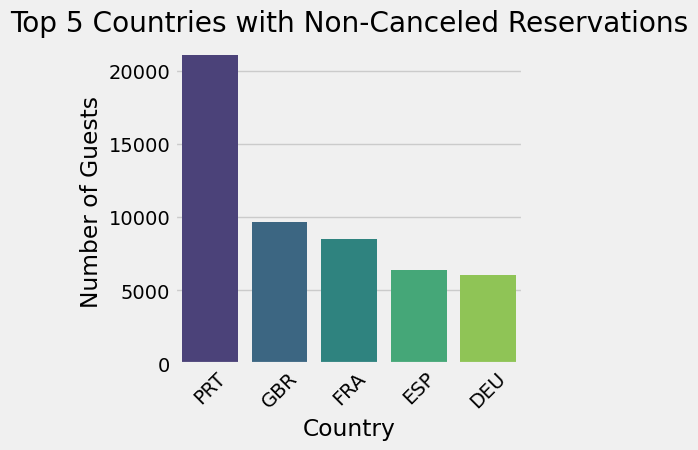

In [146]:
# Menghitung jumlah tamu berdasarkan negara yang tidak dibatalkan
top_countries = country_wise_guests.iloc[0:5]

# Membuat bar chart
plt.figure(figsize=(4, 4))
sns.barplot(x=top_countries.country, y=top_countries['No of guests'], palette='viridis')
plt.title('Top 5 Countries with Non-Canceled Reservations')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()


Terlihat bahwa jumlah pemesanan yang tidak dibatalkan paling banyak berasal dari inisial country PRT yang berarti Portugal. 
 
**Insights**  
Management Hotel XYZ dapat menggunakan informasi ini untuk membuat kampanye pemasaran yang ditargetkan kepada negara-negara yang menyumbangkan jumlah tamu terbanyak, seperti Portugal (PRT) dan Inggris (GBR), agar menjaga kesetiaan tamu untuk tetap memilih Hotel XYZ sebagai tempat menginap. Selain itu, dapat juga memberikan penawaran atau insentif untuk mendorong pemesanan dan mengurangi pembatalan.

Untuk menggali lebih dalam, kita akan melakukan filter dataset untuk fokus pada pemesanan yang aktif. Hal ini memungkinkan kita untuk mengukur rata-rata tarif harian (ADR) dengan akurat untuk kedua jenis hotel sepanjang bulan-bulan tertentu. Dengan mengelompokkan data berdasarkan bulan kedatangan, kita dapat mengamati bagaimana harga berfluktuasi sepanjang tahun.



In [147]:
# Filter the dataset for active bookings at Resort Hotel
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]

# Filter the dataset for active bookings at City Hotel
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

# Calculate the average daily rate (ADR) for Resort Hotel by arrival month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

# Calculate the average daily rate (ADR) for City Hotel by arrival month
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

# Merge the two DataFrames on the arrival month
final_hotel = resort_hotel.merge(city_hotel, on='arrival_date_month')

# Rename the columns for clarity
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']


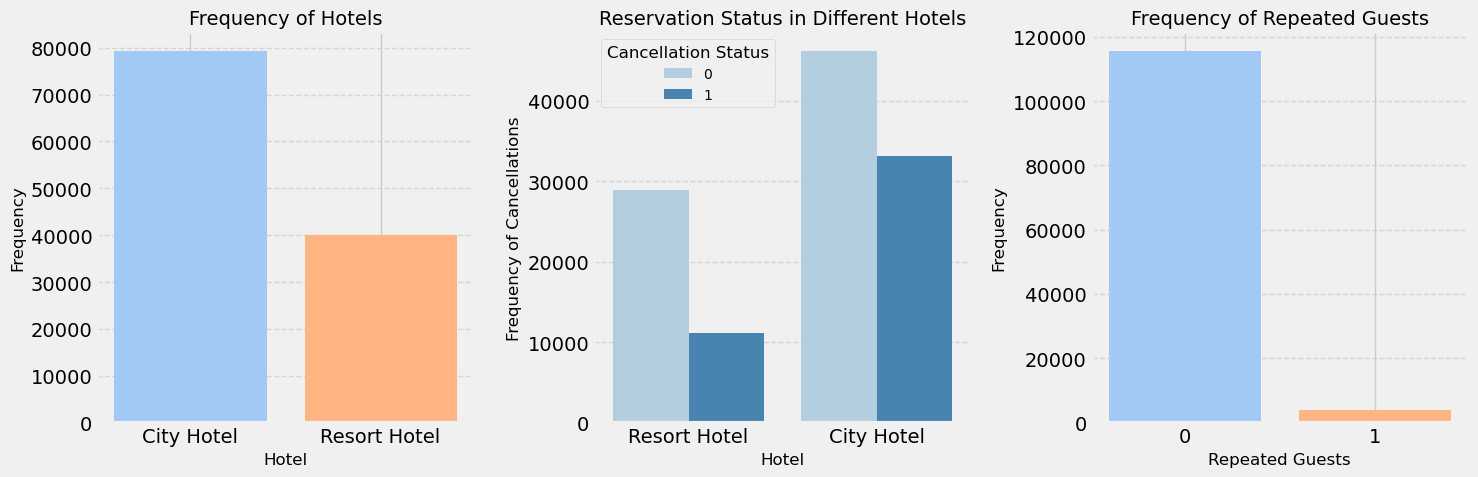

In [148]:
# Canvas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Ukuran lebih besar untuk kerapian

# Graph for hotel frequency
hotel = df['hotel'].value_counts()
bars = ax1.bar(hotel.index, hotel.values, 
                color=sns.color_palette("pastel", len(hotel)))
ax1.set_xlabel('Hotel', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Frequency of Hotels', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid untuk sumbu y

# Count cancellations
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues', ax=ax2)
ax2.set_title('Reservation Status in Different Hotels', fontsize=14)
ax2.set_xlabel('Hotel', fontsize=12)
ax2.set_ylabel('Frequency of Cancellations', fontsize=12)
ax2.legend(title='Cancellation Status', fontsize=10, title_fontsize=12)  # Tambahkan legend
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Count repeated guests
repeated_guests = df['is_repeated_guest'].value_counts()
bars = ax3.bar(repeated_guests.index.astype(str), repeated_guests.values, 
                color=sns.color_palette("pastel", len(repeated_guests)))
ax3.set_xlabel('Repeated Guests', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Frequency of Repeated Guests', fontsize=14)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Menyesuaikan layout
plt.show()

**Grafik 1: Frekuensi Hotel**  
* **City Hotel** memiliki frekuensi pemesanan yang jauh lebih tinggi dibandingkan dengan **Resort Hotel**. Ini menunjukkan bahwa City Hotel lebih populer atau mungkin lebih mudah diakses oleh sebagian besar pelanggan dari beberapa negara.
* Perbedaan yang signifikan antara kedua jenis hotel ini mengindikasikan adanya segmen pasar yang berbeda untuk masing-masing jenis hotel.

**Grafik 2: Status Pembatalan di Berbagai Hotel**  
* **Resort Hotel** memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan **City Hotel**. Hal ini bisa mengindikasikan beberapa faktor, seperti:
    * Fleksibelitas pemesanan: Mungkin kebijakan pembatalan di Resort Hotel lebih fleksibel, sehingga pelanggan lebih mudah membatalkan reservasi.
    * Musim: Jika data ini dikumpulkan dalam periode tertentu, mungkin ada musim-musim tertentu di mana tingkat pembatalan di Resort Hotel lebih tinggi.

**Grafik 3: Frekuensi Tamu yang Mengulang**  
* Terlihat bahwa lebih banyak tamu yang tidak kembali ke Hotel XYZ.

**Insight**
* Ada perbedaan yang jelas antara preferensi pelanggan terhadap City Hotel dan Resort Hotel. Hal ini menunjukkan bahwa kedua jenis hotel ini menyasar segmen pasar yang berbeda.
* Tingkat pembatalan yang lebih tinggi di Resort Hotel bisa menjadi indikasi bahwa tingkat kepuasan pelanggan di hotel jenis ini mungkin lebih rendah dibandingkan dengan City Hotel.

Selanjutnya, kita akan melihat bagaimana karakteristik dari tamu Hotel.


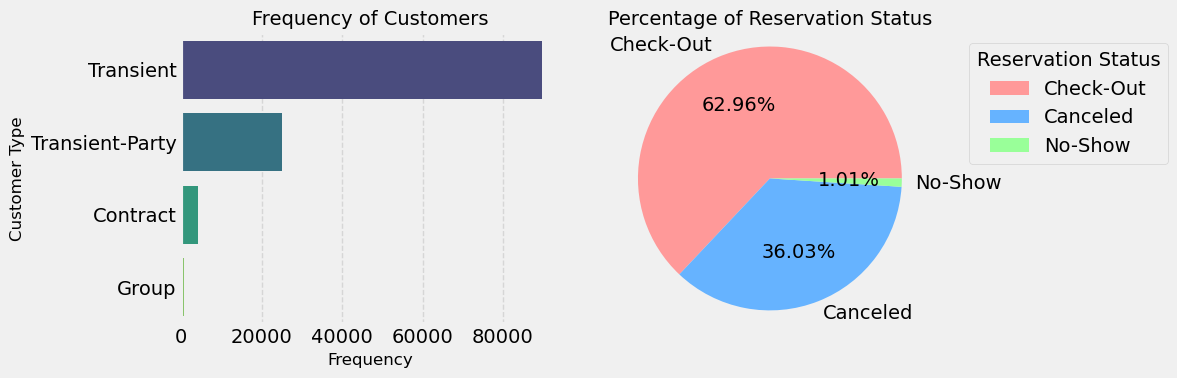

In [149]:
# Canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Ukuran lebih besar untuk kerapian

# Graph for customer type frequency
cust = df['customer_type'].value_counts().reset_index()
cust.columns = ['customer_type', 'count']
sns.barplot(data=cust, y='customer_type', x='count', palette='viridis', ax=ax1)
ax1.set_xlabel('Frequency', fontsize=12)
ax1.set_ylabel('Customer Type', fontsize=12)
ax1.set_title('Frequency of Customers', fontsize=14)
ax1.grid(axis='x', linestyle='--', alpha=0.7)  # Tambahkan grid untuk sumbu x

# Count reservation status
resv = df['reservation_status'].value_counts()

# Make pie chart for reservation status
resv.plot(kind='pie', autopct='%.2f%%', legend=False, ax=ax2, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax2.set_title('Percentage of Reservation Status', fontsize=14)
ax2.set_ylabel('')  
ax2.axis('equal')  

# Legend
ax2.legend(resv.index, title='Reservation Status', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Grafik 1: Frekuensi Tipe Pelanggan**

* Tamu Transien mendominasi jumlah pemesanan. Ini menunjukkan bahwa sebagian besar tamu yang datang adalah tamu individu atau kelompok kecil yang melakukan pemesanan secara spontan atau dalam jangka waktu yang singkat.
* Tamu Kontrak dan Tamu Grup memiliki jumlah yang jauh lebih sedikit dibandingkan dengan tamu transien. Ini mengindikasikan bahwa hotel ini mungkin tidak terlalu diminati oleh segmen dengan kelompok besar.

**Grafik 2: Persentase Status Reservasi**

* Check-out memiliki persentase tertinggi, yang menunjukkan bahwa sebagian besar reservasi yang dibuat berhasil diselesaikan dengan tamu yang melakukan check-out.
* Pembatalan memiliki persentase yang cukup signifikan, menunjukkan bahwa ada sejumlah tamu yang membatalkan reservasi mereka.
* No-show memiliki persentase yang sangat kecil, mengindikasikan bahwa jumlah tamu yang tidak datang tanpa pemberitahuan sebelumnya relatif rendah.

**Insight**

* Hotel ini tampaknya lebih diminati oleh tamu individu atau kelompok kecil yang melakukan pemesanan secara langsung.
* Tingkat pembatalan yang cukup tinggi bisa menjadi indikasi bahwa ada beberapa faktor yang menyebabkan tamu membatalkan reservasi mereka. Maka perlu adanya perhatian khusus pada masalah ini.

**Rekomendasi Bisnis**

1. Meningkatkan Pemasaran ke Segmen Korporat dan Grup dengan melakukan :
   * Jalin kemitraan dengan perusahaan atau agen perjalanan yang sering melakukan pemesanan untuk kelompok besar untuk memperluas pasar.
   * Tawarkan paket khusus yang menarik bagi kelompok besar, seperti diskon untuk pemesanan dalam jumlah banyak atau fasilitas tambahan dan menjangkaunya melalui email dan sebagainya.

2. Menganalisis Penyebab Pembatalan dengan melakukan survei kepada tamu yang membatalkan reservasi untuk mengetahui alasannya.

3. Meningkatkan Loyalitas Tamu Transien melalui implementasi program loyalitas yang menarik untuk tamu transien, seperti diskon untuk pemesanan berikutnya atau akses ke fasilitas eksklusif.


Selanjutnya kita akan melihat bagaimana perbandingan harga antar jenis hotel di setiap bulannya.

In [150]:
data = df.copy()
data['arrival_date'] = pd.to_datetime(
    data['arrival_date_day_of_month'].astype(str) + '-' +
    data['arrival_date_month'].astype(str)  + '-' +
    data['arrival_date_year'].astype(str)
)

In [151]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [152]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [153]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1700x800 with 0 Axes>

Grafik di atas menunjukkan fluktuasi harga kamar per malam untuk dua jenis hotel, yaitu resort dan city hotel, selama setahun. Terlihat jelas adanya tren musiman pada harga kamar kedua jenis hotel tersebut.

* Harga Resort: Harga kamar resort mengalami kenaikan yang signifikan dari bulan Januari hingga mencapai puncaknya pada bulan Agustus. Setelah itu, harga mulai menurun secara bertahap hingga akhir tahun.  
* Harga City Hotel: Harga kamar city hotel juga menunjukkan tren kenaikan, namun tidak setajam kenaikan harga resort. Puncak harga city hotel juga terjadi pada bulan Agustus, diikuti penurunan hingga akhir tahun.  

**Insight**  
* Bulan Agustus merupakan puncak musim ramai bagi kedua jenis hotel, ditandai dengan kenaikan harga yang signifikan. Ini mengindikasikan adanya peningkatan permintaan kamar pada bulan tersebut.  
* Fluktuasi harga kamar mengikuti pola musiman yang cukup jelas. Hal ini menunjukkan bahwa harga kamar sangat dipengaruhi oleh faktor musiman seperti liburan, cuti sekolah, atau event-event tertentu.  

**Rekomendasi Bisnis**

Berdasarkan analisis grafik di atas, berikut beberapa rekomendasi bisnis yang dapat dipertimbangkan:
* Tawarkan paket bundling yang menarik pada musim-musim tertentu untuk meningkatkan pendapatan.
* Berikan diskon untuk pemesanan jauh hari, terutama pada musim ramai untuk mendorong pemesanan lebih awal.
* Strategi Pemasaran:
    * Lakukan promosi khusus pada musim-musim low-season untuk menarik lebih banyak tamu.
    * Lakukan segmentasi pasar untuk menawarkan paket yang lebih relevan dengan kebutuhan masing-masing segmen.
    * Manfaatkan platform digital untuk meningkatkan visibilitas hotel dan menarik calon tamu.

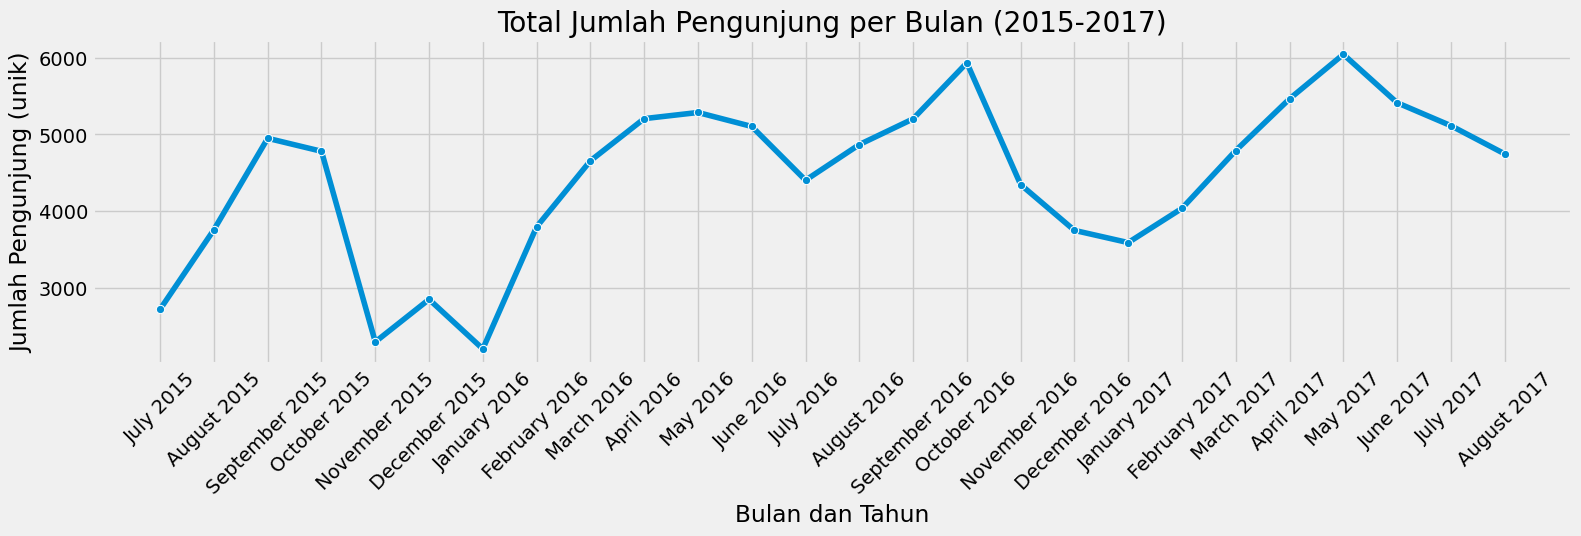

In [154]:
data = df.copy()
data['arrival_date'] = pd.to_datetime(
    data['arrival_date_day_of_month'].astype(str) + '-' +
    data['arrival_date_month'].astype(str)  + '-' +
    data['arrival_date_year'].astype(str)
)

data_filtered = data[data['arrival_date'].dt.year.isin([2015, 2016, 2017])]

# Membuat kolom bulan dan tahun
data_filtered['year'] = data_filtered['arrival_date'].dt.year
data_filtered['month'] = data_filtered['arrival_date'].dt.month

# Menghitung jumlah pengunjung per bulan dan tahun
monthly_visitors = data_filtered.groupby(['year', 'month'])['name'].nunique().reset_index()

# Membuat kolom datetime untuk urutan yang berkelanjutan
monthly_visitors['date'] = pd.to_datetime(monthly_visitors[['year', 'month']].assign(day=1))

# Membuat kolom untuk label bulan dan tahun
monthly_visitors['month_year'] = monthly_visitors['date'].dt.strftime('%B %Y')

# Mengatur ukuran grafik
plt.figure(figsize = (17, 4))

# Membuat line plot untuk jumlah pengunjung
sns.lineplot(data=monthly_visitors, x='month_year', y='name', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Total Jumlah Pengunjung per Bulan (2015-2017)')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Pengunjung (unik)')

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

Grafik di atas menunjukkan fluktuasi jumlah pengunjung hotel selama periode tiga tahun, dari tahun 2015 hingga 2017. Dari grafik ini, secara visual dapat kita lihat adanya pola fluktuasi yang cukup jelas, di mana jumlah pengunjung cenderung meningkat pada bulan-bulan tertentu dan menurun pada bulan-bulan lainnya. Puncak tertinggi peningkatan pengunjung terjadi pada bulan September 2016 dan bulak May 2017. Ini mengindikasikan adanya faktor musiman yang mempengaruhi jumlah pengunjung.

**Insight**  
Faktor musiman seperti liburan, cuti sekolah, atau event-event tertentu kemungkinan besar menjadi penyebab utama fluktuasi jumlah pengunjung.

**Rekomendasi Bisnis**
* Lakukan analisis lebih mendalam untuk mengidentifikasi faktor musiman yang paling berpengaruh terhadap jumlah pengunjung serta memantau tren dan perubahan perilaku pengunjung..
* Sesuaikan strategi pemasaran dan operasional sesuai dengan musim. Misalnya, meningkatkan promosi pada musim ramai dan menawarkan paket khusus pada musim sepi.


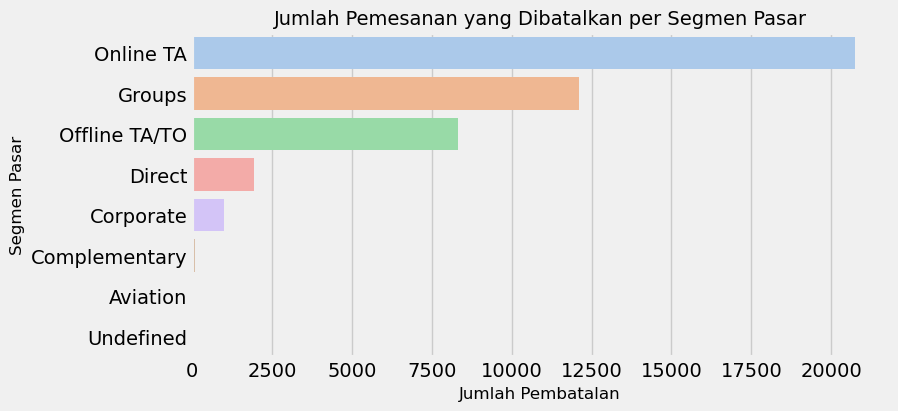

In [155]:
# Menyaring data untuk yang dibatalkan
data_cancelled = df[df['is_canceled'] == 1]

# Menghitung jumlah pemesanan yang dibatalkan per segmen pasar
cancelled_counts = data_cancelled['market_segment'].value_counts().reset_index()
cancelled_counts.columns = ['market_segment', 'jumlah_batal']

# Mengatur ukuran grafik
plt.figure(figsize=(8, 4))

# Membuat bar chart horizontal
sns.barplot(data=cancelled_counts, y='market_segment', x='jumlah_batal', palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Pemesanan yang Dibatalkan per Segmen Pasar', fontsize=14)
plt.xlabel('Jumlah Pembatalan', fontsize=12)
plt.ylabel('Segmen Pasar', fontsize=12)

# Menampilkan plot
plt.show()


Grafik di atas menunjukkan jumlah pembatalan pemesanan yang terjadi pada setiap segmen pasar.

* Pembatalan Tertinggi dari Segmen Online TA: Segmen *Online Travel Agent* (OTA) memiliki jumlah pembatalan tertinggi. Ini mengindikasikan bahwa banyak pelanggan yang melakukan pemesanan melalui platform online cenderung membatalkan pesanan mereka.
* Pembatalan Signifikan dari Segmen Groups: Segmen *Groups* (kelompok) juga memiliki jumlah pembatalan yang cukup tinggi. Ini bisa jadi karena perubahan rencana dalam kelompok yang cukup besar atau ketidakpastian dalam jumlah akhir anggota kelompok.
* Pembatalan Relatif Rendah pada Segmen Lainnya: Segmen seperti *Offline TA/TO*, *Direct*, *Corporate*, *Complementary*, *Aviation*, dan *Undefined* memiliki jumlah pembatalan yang relatif lebih rendah dibandingkan dengan segmen *Online TA* dan *Groups*.

**Insight**
* Kemudahan dalam melakukan pemesanan dan pembatalan melalui platform online membuat pelanggan cenderung lebih sering membatalkan pesanan.

**Rekomendasi Bisnis**  
* Tinjau kembali kebijakan pembatalan untuk segmen *Online TA*. Pertimbangkan untuk menerapkan kebijakan yang lebih ketat atau memberikan insentif bagi pelanggan yang tidak membatalkan pesanan.
* Buat kebijakan yang lebih fleksibel untuk kelompok yang melakukan pemesanan jauh-jauh hari, namun tetap berikan penalti untuk pembatalan yang dilakukan dalam waktu dekat dengan tanggal kedatangan.

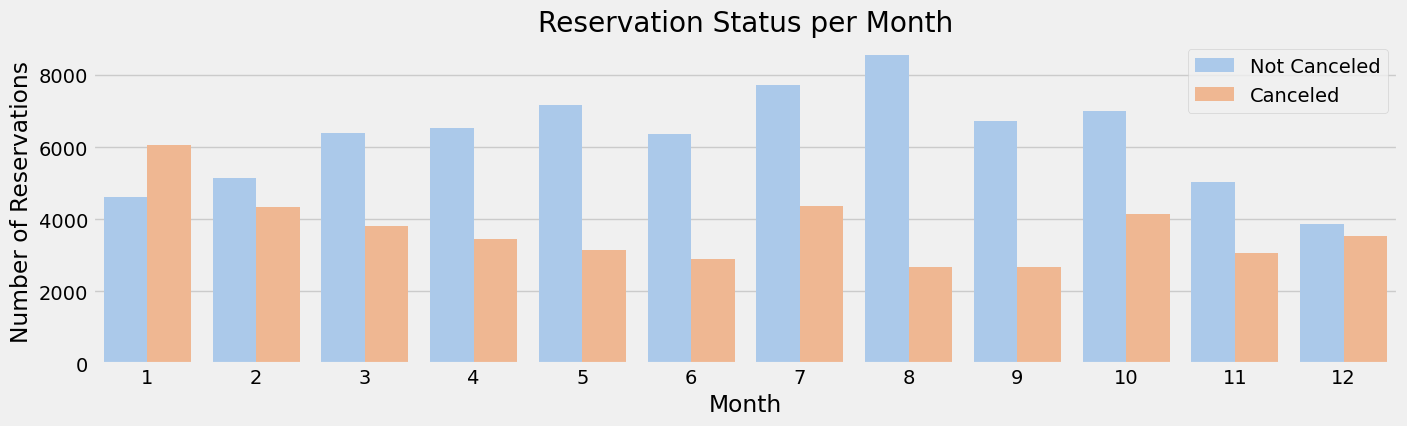

In [156]:
# Pastikan kolom 'reservation_status_date' sudah ada dalam DataFrame df
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(15, 4))
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='pastel')

# Judul dan label
plt.title('Reservation Status per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')

# Legend
plt.legend(['Not Canceled', 'Canceled'])

plt.show()


Grafik di atas menunjukkan fluktuasi jumlah pemesanan yang berhasil (tidak dibatalkan) dan yang dibatalkan setiap bulannya. Terdapat beberapa poin penting yang bisa kita lihat:
* Terdapat pola fluktuasi yang cukup jelas, di mana jumlah pemesanan yang berhasil dan dibatalkan cenderung meningkat pada bulan-bulan tertentu dan menurun pada bulan-bulan lainnya. Ini mengindikasikan adanya faktor musiman yang mempengaruhi jumlah pemesanan dan pembatalan.
* Persentase pembatalan bervariasi setiap bulan. Ada bulan-bulan tertentu dengan tingkat pembatalan yang lebih tinggi dibandingkan bulan lainnya.
* Secara umum, baik jumlah pemesanan yang berhasil maupun yang dibatalkan cenderung mengalami fluktuasi dari bulan ke bulan.


Selanjutnya kita akan lihat apakah perbedaa

# vi. Feature Engineering

## vi.a. Cardinality Handling

Pada bagian ini, akan dilakukan penanganan kardinalitas dengan mengelompokkan berdasarkan 4 negara teratas dengan jumlah tamu terbanyak, dan menggabungkan negara-negara lainnya ke dalam kategori 'Other'. Rincian negara yang termasuk adalah:
- PRT (Portugal)
- GBR (Inggris)
- FRA (Prancis)
- ESP (Spanyol)
- Other

In [157]:
# Get the top 5 countries based on the number of bookings
top_countries = df['country'].value_counts().nlargest(5).index

# Replace countries not in the top 5 with 'Other'
df['country'] = df['country'].where(df['country'].isin(top_countries), 'Other')


In [158]:
df['country'].value_counts()

country
PRT      48590
Other    32401
GBR      12129
FRA      10415
ESP       8568
DEU       7287
Name: count, dtype: int64

## vi.b. Missing Value Handling

Pada bagian ini akan dilakukan penanganan terhadap data missing value.

In [159]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null[null['Null Values'] > 0]

,Null Values,Percentage Null Values
children,4,0.003350
agent,16340,13.686238
company,112593,94.306893


Tersisa 3 kolom yang terdapat missing value di dalamnya. Oleh karena kolom `Children` hanya memiliki persentase kurang dari 5% maka data ini akan dilakukan penghapusan. Sementara itu, kita akan lihat bagaimana korelasi kolom `agent` dan `company` terhadap kolom lainnya.

In [160]:
# correlation between minimum_payments and other features
numerik_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerik_cols].corr()
correlation_matrix['agent'].sort_values(ascending=False)

agent                             1.000000
company                           0.350746
stays_in_week_nights              0.182382
required_car_parking_spaces       0.177353
stays_in_weekend_nights           0.140739
booking_changes                   0.067010
arrival_date_year                 0.063457
children                          0.041066
babies                            0.036184
total_of_special_requests         0.034162
is_repeated_guest                 0.031527
previous_bookings_not_canceled    0.023252
arrival_date_day_of_month         0.001487
previous_cancellations           -0.012488
adr                              -0.024695
arrival_date_week_number         -0.031201
adults                           -0.035594
days_in_waiting_list             -0.055151
lead_time                        -0.069741
is_canceled                      -0.083114
Name: agent, dtype: float64

In [161]:
correlation_matrix = df[numerik_cols].corr()
correlation_matrix['company'].sort_values(ascending=False)

company                           1.000000
agent                             0.350746
arrival_date_year                 0.259095
adults                            0.207793
stays_in_week_nights              0.182211
lead_time                         0.151464
booking_changes                   0.122098
adr                               0.086376
stays_in_weekend_nights           0.066749
arrival_date_day_of_month         0.044858
children                          0.030931
babies                            0.019206
days_in_waiting_list              0.000411
required_car_parking_spaces      -0.012916
is_canceled                      -0.020642
arrival_date_week_number         -0.076760
total_of_special_requests        -0.098558
previous_cancellations           -0.184574
previous_bookings_not_canceled   -0.208557
is_repeated_guest                -0.244586
Name: company, dtype: float64

Kolom `gent` dan `company` memiliki korelasi yang sangat lemah terhadap fitur-fitur lainnya sehingga peneliti memutuskan untuk menghapus kedua kolom tersebut.

In [162]:
# drop row missing value
df = df.dropna(subset=['children','country'])

In [163]:
# drop column missing value
df = df.drop(columns=['agent','company'])

In [164]:
# remove agent and company from list
cat_cols.remove('agent')
cat_cols.remove('company')
cat_cols

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'arrival_date_week_number',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [165]:
# recheck missing value
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null[null['Null Values'] > 0]

,Null Values,Percentage Null Values


Missing value telah teratasi. Selanjutnya kita akan lakukan feature selection.

## vi.c. Feature Selection

Untuk memilih fitur-fitur apa saja yang berguna memberikan informasi dalam melakukan prediksi kolom `is_cancelled`, peneliti melakukan uji korelasi dengan menggunakan chi-square untuk kolom dengan jenis kategorikal dan menggunakan pointbiserialr untuk kolom numerikal.

In [166]:
import pandas as pd
from scipy import stats

# Initialize an empty list to store the results
results_cat = []

# Loop through categorical columns
for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['is_canceled'])
    pval_cat = stats.chi2_contingency(cross_tab).pvalue
    significant = "Berkorelasi" if pval_cat < 0.05 else "Tidak berkorelasi"

    # Append results to the list
    results_cat.append({
        'Fitur': col,
        'P-Value': pval_cat,
        'Keterangan': significant
    })

# Create a DataFrame from the results
results_cat_df = pd.DataFrame(results_cat)

# Filter new categorical columns based on p-value
cat_cols_new = results_cat_df[results_cat_df['P-Value'] < 0.05]['Fitur'].tolist()
results_cat_df

,Fitur,P-Value,Keterangan
0,hotel,0.000000e+00,Berkorelasi
1,is_canceled,0.000000e+00,Berkorelasi
2,arrival_date_year,1.875831e-18,Berkorelasi
3,arrival_date_month,3.928650e-119,Berkorelasi
4,arrival_date_day_of_month,8.121931e-51,Berkorelasi
5,arrival_date_week_number,1.671647e-202,Berkorelasi
6,meal,1.365771e-64,Berkorelasi
7,country,0.000000e+00,Berkorelasi
8,market_segment,0.000000e+00,Berkorelasi
9,distribution_channel,0.000000e+00,Berkorelasi


Terdapat beberapa kolom yang tidak berkorelasi terhadap target diantaranya `name`, `email`, `phone-number`, dan `credit_card` sehingga fitur-fitur tersebut tidak akan diikutsertakan dalam membangun model prediksi.

In [131]:
# show new cat cols
cat_cols_new

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'arrival_date_week_number',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [168]:
import pandas as pd
from scipy.stats import pointbiserialr

# Initialize an empty list to store the results
results = []

# Loop through numerical columns
for col in num_cols:
    corr, pval_num = pointbiserialr(df['is_canceled'], df[col])
    significant = "Berkorelasi" if pval_num < 0.05 else "Tidak berkorelasi"
    
    # Append results to the list
    results.append({
        'Fitur': col,
        'Skor Korelasi': corr,
        'P-Value': pval_num,
        'Keterangan': significant
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Filter new numerical columns based on p-value
num_cols_new = results_df[results_df['P-Value'] < 0.05]['Fitur'].tolist()


results_df

,Fitur,Skor Korelasi,P-Value,Keterangan
0,lead_time,0.293177,0.000000e+00,Berkorelasi
1,stays_in_weekend_nights,-0.001783,5.377670e-01,Tidak berkorelasi
2,stays_in_week_nights,0.024771,1.125557e-17,Berkorelasi
3,adults,0.059990,1.319221e-95,Berkorelasi
4,children,0.005048,8.113828e-02,Tidak berkorelasi
5,babies,-0.032488,2.959610e-29,Berkorelasi
6,previous_cancellations,0.110140,8.265323e-319,Berkorelasi
7,previous_bookings_not_canceled,-0.057355,1.523888e-87,Berkorelasi
8,booking_changes,-0.144371,0.000000e+00,Berkorelasi
9,days_in_waiting_list,0.054193,2.401218e-78,Berkorelasi


Terdapat dua kolom yang tidak berkorelasi terhadap target diantaranya `stays_in_weekend_nights` dan `children`, `phone-number`, dan `credit_card` sehingga kedua fitur tersebut tidak akan diikutsertakan dalam membangun model prediksi.

In [170]:
# show new num cols
num_cols_new

['lead_time',
 'stays_in_week_nights',
 'adults',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [171]:
# define new df
new_df = df[cat_cols_new + num_cols_new]

In [172]:
new_df

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2015,July,1,27,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out,342,0,2,0,0,0,3,0,0.00,0,0
1,Resort Hotel,0,2015,July,1,27,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out,737,0,2,0,0,0,4,0,0.00,0,0
2,Resort Hotel,0,2015,July,1,27,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out,7,1,1,0,0,0,0,0,75.00,0,0
3,Resort Hotel,0,2015,July,1,27,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out,13,1,1,0,0,0,0,0,75.00,0,0
4,Resort Hotel,0,2015,July,1,27,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,14,2,2,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,30,35,BB,Other,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out,23,5,2,0,0,0,0,0,96.14,0,0
119386,City Hotel,0,2017,August,31,35,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,Check-Out,102,5,3,0,0,0,0,0,225.43,0,2
119387,City Hotel,0,2017,August,31,35,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,Check-Out,34,5,2,0,0,0,0,0,157.71,0,4
119388,City Hotel,0,2017,August,31,35,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,109,5,2,0,0,0,0,0,104.40,0,0


In [173]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   arrival_date_year               119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_day_of_month       119386 non-null  int64  
 5   arrival_date_week_number        119386 non-null  int64  
 6   meal                            119386 non-null  object 
 7   country                         119386 non-null  object 
 8   market_segment                  119386 non-null  object 
 9   distribution_channel            119386 non-null  object 
 10  is_repeated_guest               119386 non-null  int64  
 11  reserved_room_type              119386 non-null  object 
 12  assigned_room_type   

Selanjutnya kita akan melihat apakah dalam data ini terdapat multikolinearitas atau tidak.

In [174]:
# Multikolinearity Checking
def calc_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

calc_vif(new_df[num_cols_new])

,variables,VIF
0,lead_time,2.123692
1,stays_in_week_nights,2.733380
2,adults,6.474927
3,babies,1.023659
4,previous_cancellations,1.049734
5,previous_bookings_not_canceled,1.039167
6,booking_changes,1.135791
7,days_in_waiting_list,1.052941
8,adr,4.912603
9,required_car_parking_spaces,1.092099


Tidak adanya multikolinearitas diantara fitur-fitur dalam dataset. Namun, peneliti mempertimbangkan untuk melakukan drop kolom `arrival_date_day_of_month` dan `arrival_date_week_number` untuk mengurangi kardinalitas dalam data.

In [175]:
# drop columns
new_df.drop(['arrival_date_day_of_month','arrival_date_week_number'] , axis = 1, inplace = True)

In [176]:
# re-asign cat cols
cat_cols_new.remove('arrival_date_day_of_month')
cat_cols_new.remove('arrival_date_week_number')

In [177]:
# show cat cols
cat_cols_new

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

## vi.d. Split Features (X) and Target (y)

Pada bagian ini akan dilakukan pemisahan antara fitur dengan targetnya.

In [179]:
# define features (X)
X=new_df.drop(['is_canceled'], axis=1)

# define y
y=new_df['is_canceled'] 

In [180]:
X.head(3) # shpw top row of X

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out,342,0,2,0,0,0,3,0,0.0,0,0
1,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out,737,0,2,0,0,0,4,0,0.0,0,0
2,Resort Hotel,2015,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out,7,1,1,0,0,0,0,0,75.0,0,0


In [181]:
y.head(3) # show top row of y

0    0
1    0
2    0
Name: is_canceled, dtype: int64

## vi.e. Split Train-set and Test-set

Pada bagian ini akan dilakukan pemisahan terhadap X dan y menjadi data latih dan data uji. Data latih sebanyak 80% dari data asli.

In [182]:
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state=107)

print(f'Main X data size : {X.shape}')
print(f'Main y data size : {y.shape}\n')
print(f'X train size : {X_train.shape}')
print(f'X test size : {X_test.shape}')
print(f'y train size : {y_train.shape}')
print(f'y test size : {y_test.shape}')

Main X data size : (119386, 24)
Main y data size : (119386,)

X train size : (95508, 24)
X test size : (23878, 24)
y train size : (95508,)
y test size : (23878,)


## vi.f. Outlier Hanlding

Pada bagian ini akan dilakukan penanganan data outlier.

In [183]:
#check distribution form skewness

listItem= []
for col in num_cols_new:
  listItem.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,lead_time,1.3,skewed
1,stays_in_week_nights,2.9,skewed
2,adults,18.3,skewed
3,babies,24.6,skewed
4,previous_cancellations,24.5,skewed
5,previous_bookings_not_canceled,23.5,skewed
6,booking_changes,6.0,skewed
7,days_in_waiting_list,11.9,skewed
8,adr,10.5,skewed
9,required_car_parking_spaces,4.2,skewed


Seluruh kolom numerikal tidak berdistribusi normal dan memiliki ekor ke kanan.

In [184]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[col].quantile(0.75) + (IQR * 1.5)
  else:
    lower_boundary = df[col].mean() - 3* df[col].std()
    upper_boundary = df[col].mean() + 3* df[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,lead_time,373.00,-195.00,2.52
1,stays_in_week_nights,6.00,-2.00,2.81
2,adults,2.00,2.00,24.88
3,babies,0.00,0.00,0.77
4,previous_cancellations,0.00,0.00,5.43
5,previous_bookings_not_canceled,0.00,0.00,3.03
6,booking_changes,0.00,0.00,15.14
7,days_in_waiting_list,0.00,0.00,3.10
8,adr,211.06,-15.77,3.18
9,required_car_parking_spaces,0.00,0.00,6.21


Terlihat bahwa kita memiliki dua kolom dengan persentase outlier diatas 10% sehingga kita perlu menangani kedua kolom tersebut dengan metode capping menggunakan Winsorizer.

In [185]:
# Apply Winsorization
winsoriser = Winsorizer(capping_method='quantiles',
                             tail='left',
                             fold=0.05,
                             variables=['adults','booking_changes'],
                             missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)


In [186]:
X_train_capped

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
68812,City Hotel,2017,May,BB,Other,Online TA,TA/TO,0,D,D,No Deposit,Transient,Canceled,178,2,1,0,0,0,0,0,139.28,0,0
24678,Resort Hotel,2016,May,BB,Other,Online TA,TA/TO,0,D,E,No Deposit,Transient,Check-Out,6,0,2,0,0,0,0,0,94.00,0,0
18067,Resort Hotel,2015,October,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,Contract,Check-Out,88,5,2,0,0,0,0,0,61.73,0,3
95728,City Hotel,2016,August,HB,ESP,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out,106,1,3,0,0,0,0,0,141.90,0,0
110794,City Hotel,2017,April,BB,FRA,Direct,Direct,0,D,D,No Deposit,Transient,Check-Out,112,2,2,0,0,0,0,0,123.75,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118095,City Hotel,2017,August,SC,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,21,0,2,0,0,0,0,0,160.00,0,2
72338,City Hotel,2017,July,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,Transient,Canceled,243,4,2,0,0,0,0,0,110.00,0,0
70090,City Hotel,2017,June,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,Transient,Canceled,219,2,2,0,0,0,0,0,105.00,0,0
86493,City Hotel,2016,April,BB,Other,Online TA,TA/TO,0,A,A,No Deposit,Transient-Party,Check-Out,82,2,1,0,0,0,1,0,81.90,0,0


## vi.g. Split between Numerical and Categorical Columns

Pada bagian ini akan dilakukan pemisahan data berjenis numerikal dan kategorikal.

In [187]:
X_train_capped.columns

Index(['hotel', 'arrival_date_year', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'lead_time',
       'stays_in_week_nights', 'adults', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [188]:
num_cols_new

['lead_time',
 'stays_in_week_nights',
 'adults',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [189]:
cat_cols_new

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [190]:
cat_cols_enc = ['is_repeated_guest']
cat_cols_num = [col for col in cat_cols_new if col not in cat_cols_enc and col != 'is_canceled']

print(f'Numerical = {num_cols_new}')
print(f'Categorical encoded = {cat_cols_enc}')
print(f'Categorical = {cat_cols_num}')


Numerical = ['lead_time', 'stays_in_week_nights', 'adults', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical encoded = ['is_repeated_guest']
Categorical = ['hotel', 'arrival_date_year', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [191]:
#split numerical and categorical columns

X_train_num = X_train_capped[num_cols_new]
X_test_num = X_test_capped[num_cols_new]

X_train_cat = X_train_capped[cat_cols_num]
X_test_cat = X_test_capped[cat_cols_num]

X_train_enc = X_train_capped[cat_cols_enc]
X_test_enc = X_test_capped[cat_cols_enc]

In [192]:
X_train_cat.head()

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
68812,City Hotel,2017,May,BB,Other,Online TA,TA/TO,D,D,No Deposit,Transient,Canceled
24678,Resort Hotel,2016,May,BB,Other,Online TA,TA/TO,D,E,No Deposit,Transient,Check-Out
18067,Resort Hotel,2015,October,BB,GBR,Offline TA/TO,TA/TO,D,D,No Deposit,Contract,Check-Out
95728,City Hotel,2016,August,HB,ESP,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
110794,City Hotel,2017,April,BB,FRA,Direct,Direct,D,D,No Deposit,Transient,Check-Out


In [193]:
X_train_num.head()

,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
68812,178,2,1,0,0,0,0,0,139.28,0,0
24678,6,0,2,0,0,0,0,0,94.00,0,0
18067,88,5,2,0,0,0,0,0,61.73,0,3
95728,106,1,3,0,0,0,0,0,141.90,0,0
110794,112,2,2,0,0,0,0,0,123.75,0,1


In [194]:
X_train_enc.head()

,is_repeated_guest
68812,0
24678,0
18067,0
95728,0
110794,0


## vi.h. Feature Encoding

Pada bagian ini akan dilakukan encoding secara manual, namun, untuk membangun model, peneliti akan memasukkan feature encoding ini dalam pipeline. Teknik encoding yang dilakukan adalah dengan menggunakan OneHotEncoder karena pada kolom-kolom kategorikal tersebut tidak memiliki urutan pada setiap nilainya.

In [195]:
ohe_enc= OneHotEncoder(sparse_output=False)

ohe_enc.fit(X_train_cat[cat_cols_num])

OneHotEncoder(sparse_output=False)

In [196]:
# encode train
X_train_ohe= pd.DataFrame(ohe_enc.transform(X_train_cat[cat_cols_num]),
                          columns=ohe_enc.get_feature_names_out())

# encode test
X_test_ohe= pd.DataFrame(ohe_enc.transform(X_test_cat[cat_cols_num]),
                          columns=ohe_enc.get_feature_names_out())

In [65]:
X_train_ohe

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95503,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
95504,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95505,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95506,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [197]:
X_train_enc

,is_repeated_guest
68812,0
24678,0
18067,0
95728,0
110794,0
...,...
118095,0
72338,0
70090,0
86493,0


## vi.i. Feature Scaling

Sama hal nya dengan feature encoding, pada feature scaling disini akan dilakukan secara manual meskipun dalam membangun model akan dimasukkan ke dalam pipeline. Scaling dilakukan menggunakan StandardScaler karena kita telah mengatasi outlier sehingga diasumsikan data mendekati distribusi normal.

In [198]:
# define scaling method
scaler = StandardScaler()

# .transform
scaler.fit(X_train_num[num_cols_new])
X_train_num_scaled = scaler.transform(X_train_num[num_cols_new])
X_test_num_scaled = scaler.transform(X_test_num[num_cols_new])


In [199]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=num_cols_new)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=num_cols_new)

In [69]:
X_train_num_scaled_df

,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.251058,0.04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.026942,0.0,0.0
1,0.008463,0.00,0.018519,0.0,0.0,0.0,0.000000,0.0,0.018567,0.0,0.0
2,0.124118,0.10,0.018519,0.0,0.0,0.0,0.000000,0.0,0.012598,0.0,0.6
3,0.149506,0.02,0.037037,0.0,0.0,0.0,0.000000,0.0,0.027427,0.0,0.0
4,0.157969,0.04,0.018519,0.0,0.0,0.0,0.000000,0.0,0.024070,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
95503,0.029619,0.00,0.018519,0.0,0.0,0.0,0.000000,0.0,0.030775,0.0,0.4
95504,0.342736,0.08,0.018519,0.0,0.0,0.0,0.000000,0.0,0.021526,0.0,0.0
95505,0.308886,0.04,0.018519,0.0,0.0,0.0,0.000000,0.0,0.020602,0.0,0.0
95506,0.115656,0.04,0.000000,0.0,0.0,0.0,0.047619,0.0,0.016329,0.0,0.0


In [200]:
# Concatenate for X_train_final
X_train_final = np.concatenate([
    X_train_num_scaled, 
    X_train_enc, 
    X_train_ohe
], axis=1)


X_test_final = np.concatenate([
    X_test_num_scaled, 
    X_test_enc, 
    X_test_ohe
], axis=1)

In [201]:
# Reset Index
X_train_num_scaled_df = X_train_num_scaled_df.reset_index(drop=True)
X_train_enc = X_train_enc.reset_index(drop=True)
X_train_ohe = X_train_ohe.reset_index(drop=True)

# Concat dataframe
X_train_combined = pd.concat([X_train_num_scaled_df, X_train_enc, X_train_ohe], axis=1)


# Reset Index
X_test_num_scaled_df = X_test_num_scaled_df.reset_index(drop=True)
X_test_enc = X_test_enc.reset_index(drop=True)
X_test_ohe = X_test_ohe.reset_index(drop=True)

# Concat dataframe
X_test_combined = pd.concat([X_test_num_scaled_df, X_test_enc, X_test_ohe], axis=1)

In [202]:
X_train_combined

,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_repeated_guest,hotel_City Hotel,hotel_Resort Hotel,arrival_date_year_2015,arrival_date_year_2016,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0.693503,-0.262686,-1.464820,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,0.729065,-0.255027,-0.721342,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.914990,-1.306655,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,-0.155347,-0.255027,-0.721342,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.148150,1.303266,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,-0.785646,-0.255027,3.065982,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.020180,-0.784670,1.945055,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,0.780239,-0.255027,-0.721342,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.076291,-0.262686,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,0.425732,-0.255027,0.541099,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95503,-0.774715,-1.306655,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,1.133770,-0.255027,1.803540,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
95504,1.301364,0.781282,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,0.157166,-0.255027,-0.721342,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95505,1.076923,-0.262686,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.13204,0.059506,-0.255027,-0.721342,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95506,-0.204261,-0.262686,-1.464820,-0.07998,-0.102721,-0.091929,1.197276,-0.13204,-0.391685,-0.255027,-0.721342,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [203]:
X_test_combined

,lead_time,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_repeated_guest,hotel_City Hotel,hotel_Resort Hotel,arrival_date_year_2015,arrival_date_year_2016,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0.609338,-0.262686,-1.464820,-0.07998,-0.102721,-0.091929,1.197276,2.571738,-0.751074,-0.255027,-0.721342,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.858880,-0.262686,-1.464820,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,-0.458094,-0.255027,1.803540,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.085642,1.303266,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,-0.304181,-0.255027,-0.721342,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.578329,4.957155,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,-0.209450,-0.255027,-0.721342,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.494164,-1.306655,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,0.352487,-0.255027,0.541099,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,-0.961749,0.259298,-1.464820,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,-0.682712,-0.255027,0.541099,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23874,-0.699901,-0.262686,0.240117,-0.07998,-0.102721,-0.091929,1.197276,-0.132040,1.875988,3.838600,-0.721342,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23875,0.253973,1.303266,0.240117,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,-0.760255,-0.255027,-0.721342,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
23876,-0.971101,-1.306655,-1.464820,-0.07998,-0.102721,-0.091929,-0.338028,-0.132040,0.079038,-0.255027,-0.721342,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# vii. Model Definition

Pada bagian ini akan dilakukan pemodelan dengan menggunakan 5 model diantaranya K Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, dan Ada Boost.

### K-Nearest Neighbours

In [206]:
# Numerical pipeline
num_pipe = Pipeline(
    steps=[                      
    ('scaler', MinMaxScaler())
])

# Cat pipeline
cat_pipe = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessing_pipeline = ColumnTransformer(
    transformers=[
    ('num', num_pipe, num_cols_new),
    ('cat', cat_pipe, cat_cols_num),
    ('cat_enc', 'passthrough', cat_cols_enc)
],remainder='passthrough')

In [207]:
# The model pipeline
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', KNeighborsClassifier()) 
])

In [209]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'adults', 'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requ...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'arrival_date_year',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('cat_enc', 'passthrough',
                                                  ['is_repeated_guest'])])),
                ('model', KNeighborsClassifier())])

Accuracy Score of KNN is : 0.9933830304045564
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15058
           1       1.00      0.98      0.99      8820

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



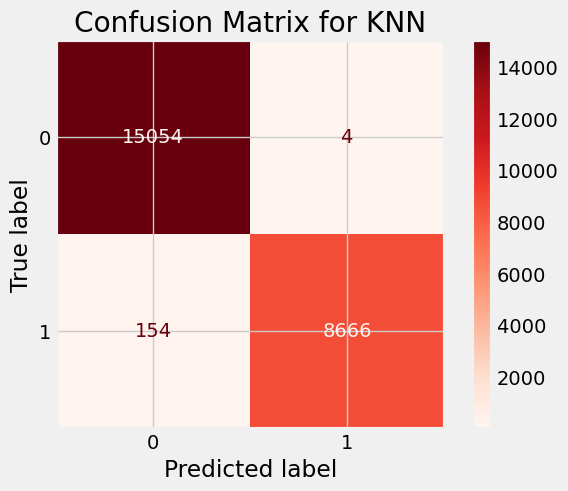

In [212]:

# Predict using the KNN model
y_pred_knn = knn_pipe.predict(X_test)

# Calculate accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

# Display results
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Classification Report : \n{clf_report}")

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=knn_pipe.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for KNN')
plt.show()


In [249]:
# Perform cross-validation
cv_scores_knn = cross_val_score(knn_pipe, X_train, y_train, cv=5)  # Replace X and y with your features and target

# Print cross-validation scores
print("Cross-validation scores:", cv_scores_knn)
print("Mean cross-validation score:", np.mean(cv_scores_knn))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_knn))


Cross-validation scores: [0.99314208 0.99450319 0.99319443 0.99319407 0.99345584]
Mean cross-validation score: 0.9934979232532051
Standard deviation of cross-validation scores: 0.0005144699655642202


### Support Vector Machine

In [213]:

svm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('classifier', SVC())
])

In [214]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'adults', 'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requ...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'arrival_date_year',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('cat_enc', 'passthrough',
                                                  ['is_repeated_guest'])])),
                ('classifier', SVC())])

Accuracy Score of SVM is : 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15058
           1       1.00      1.00      1.00      8820

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



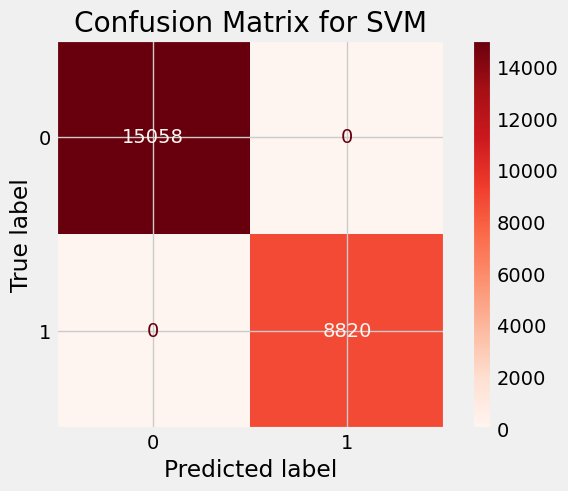

In [215]:
# Predict using the SVM model
y_pred_svm = svm_pipe.predict(X_test)

# Calculate accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
conf = confusion_matrix(y_test, y_pred_svm)
clf_report = classification_report(y_test, y_pred_svm)

# Display results
print(f"Accuracy Score of SVM is : {acc_svm}")
print(f"Classification Report : \n{clf_report}")

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=svm_pipe.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for SVM')
plt.show()


In [250]:
# Perform cross-validation
cv_scores_svm = cross_val_score(svm_pipe, X_train, y_train, cv=5)  # Replace X and y with your features and target

# Print cross-validation scores
print("Cross-validation scores:", cv_scores_svm)
print("Mean cross-validation score:", np.mean(cv_scores_svm))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_svm))


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation scores: 0.0


Decision Tree Classifier

In [216]:
# The model pipeline
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', DecisionTreeClassifier()) 
])

In [217]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'adults', 'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requ...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'arrival_date_year',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('cat_enc', 'passthrough',
                                                  ['is_repeated_guest'])])),
                ('model', DecisionTreeClassifier())])

Accuracy Score of Decision Tree is : 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15058
           1       1.00      1.00      1.00      8820

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



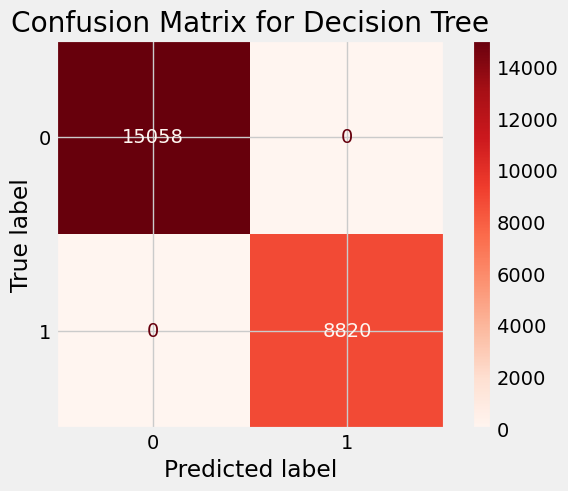

In [218]:
# Predict using the Decision Tree model
y_pred_dtc = dt_pipe.predict(X_test)

# Calculate accuracy
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

# Display results
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Classification Report : \n{clf_report}")

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=dt_pipe.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [251]:
# Perform cross-validation
cv_scores_dt = cross_val_score(dt_pipe, X_train, y_train, cv=5)  # Replace X and y with your features and target

# Print cross-validation scores
print("Cross-validation scores:", cv_scores_dt)
print("Mean cross-validation score:", np.mean(cv_scores_dt))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_dt))


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation scores: 0.0


### Random Forest

In [219]:
# The model pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', RandomForestClassifier()) 
])

In [220]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'adults', 'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requ...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'arrival_date_year',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('cat_enc', 'passthrough',
                                                  ['is_repeated_guest'])])),
                ('model', RandomForestClassifier())])

Accuracy Score of Random Forest is : 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15058
           1       1.00      1.00      1.00      8820

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



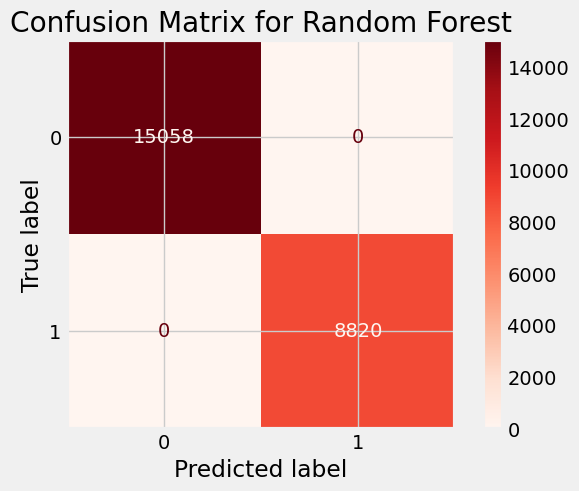

In [221]:
# Predict using the Random Forest model
y_pred_rf = rf_pipe.predict(X_test)

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
conf = confusion_matrix(y_test, y_pred_rf)
clf_report = classification_report(y_test, y_pred_rf)

# Display results
print(f"Accuracy Score of Random Forest is : {acc_rf}")
print(f"Classification Report : \n{clf_report}")

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=rf_pipe.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [259]:
# Perform cross-validation
cv_scores_rf = cross_val_score(rf_pipe, X_train, y_train, cv=5)  # Replace X and y with your features and target

# Print cross-validation scores
print("Cross-validation scores:", cv_scores_rf)
print("Mean cross-validation score:", np.mean(cv_scores_rf))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_rf))


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation scores: 0.0


### Ada Boost

In [224]:
# The model pipeline
ab_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline), 
    ('model', AdaBoostClassifier()) 
])

In [225]:
ab_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'adults', 'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requ...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'arrival_date_year',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('cat_enc', 'passthrough',
                                                  ['is_repeated_guest'])])),
                ('model', AdaBoostClassifier())])

Accuracy Score of Ada Boost Classifier is : 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15058
           1       1.00      1.00      1.00      8820

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



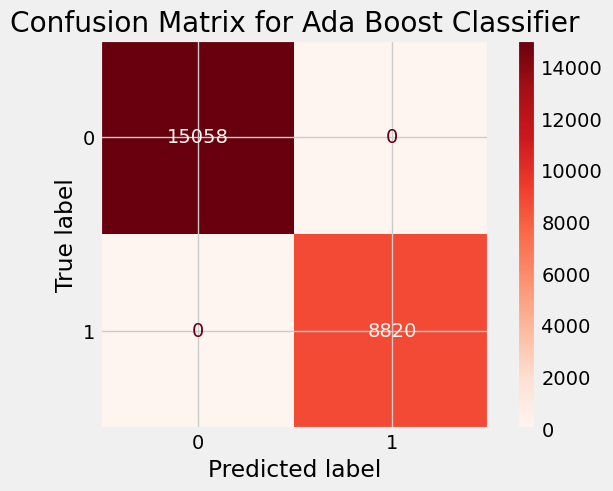

In [256]:
# Predict using the AdaBoost model
y_pred_ab = ab_pipe.predict(X_test)

# Calculate accuracy
acc_ada = accuracy_score(y_test, y_pred_ab)
conf = confusion_matrix(y_test, y_pred_ab)
clf_report = classification_report(y_test, y_pred_ab)

# Display results
print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Classification Report : \n{clf_report}")

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=ab_pipe.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Ada Boost Classifier')
plt.show()


In [257]:
# Perform cross-validation
cv_scores_ab = cross_val_score(ab_pipe, X_train, y_train, cv=5)  # Replace X and y with your features and target

# Print cross-validation scores
print("Cross-validation scores:", cv_scores_ab)
print("Mean cross-validation score:", np.mean(cv_scores_ab))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_ab))


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation scores: 0.0


# viii. Model Training

Kita telah melakukan modelling dengan 5 model, berikut adalah perbandingan kelima model tersebut.

In [262]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             ],
    'Accuracy' : [ acc_knn, acc_svm, acc_dtc, acc_rf, acc_ada],
    'Cross-val Score' : [ cv_scores_knn, cv_scores_svm, cv_scores_dt, cv_scores_rf, cv_scores_ab],
    'Mean Cross-val' : [ np.mean(cv_scores_knn), np.mean(cv_scores_svm), np.mean(cv_scores_dt), np.mean(cv_scores_rf), np.mean(cv_scores_ab)],
    'Std Cross-val' : [ np.std(cv_scores_knn), np.std(cv_scores_svm), np.std(cv_scores_dt), np.std(cv_scores_rf), np.std(cv_scores_ab)]
})

models
# models.sort_values(by = 'Score', ascending = False)

,Model,Accuracy,Cross-val Score,Mean Cross-val,Std Cross-val
0,KNN,0.993383,"[0.9931420793634175, 0.9945031933828918, 0.993194429902628, 0.9931940736087116, 0.9934558400083765]",0.993498,0.000514
1,SVM,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,0.000000
2,Decision Tree Classifier,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,0.000000
3,Random Forest Classifier,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,0.000000
4,Ada Boost Classifier,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,0.000000


Terlihat bahwa dari tabel score akurasi diatas, membangun model dengan SVM, Decision Tree, Random Forest, dan Ada Boost memiliki score sangat sempurna yaitu sebesar 1.0 yang berarti model tersebut berhasil memprediksi semua sampel dalam data uji dengan benar. Dengan kata lain, tidak ada kesalahan dalam prediksi; semua prediksi sesuai dengan label sebenarnya. Namun, akurasi yang sangat tinggi, dapat mengindikasikan terjadinya overfitting yaitu model sesuai dengan data latih namun tidak generalisasi terhadap data yang baru. Untuk pembuktian kita akan pemeriksaan nilai akurasi terhadap data test.

Oleh karena keempat model memiliki nilai akurasi yang sama dan terbaik, peneliti mempertimbangkan untuk menggunakan model **Random Forest Classifier** dengan alasan model ini dapat mengurangi risiko overfitting yang ada pada Decision Tree karena menggunakan ensemble learning dan menggabungkan banyak pohon. Selanjutnya, akan dilakukan tuning terhadap model yang dipilih.

In [230]:
# Define the hyperparameters for RandomForestClassifier
param_dist = {
    'model__n_estimators': np.arange(50, 200, 10),
    'model__max_depth': [None] + list(np.arange(10, 50, 5)),
    'model__min_samples_split': np.arange(2, 10),
    'model__min_samples_leaf': np.arange(1, 5),
}


In [231]:

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_pipe, 
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)


In [232]:
# Fit the model to the data (replace X_train and y_train with your actual data)
rf_random_search.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['lead_time',
                                                                                'stays_in_week_nights',
                                                                                'adults',
                                                                                'babies',
                                                                                'previous_cancellations',
                                                                                'previous_bookings_not_canceled',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'adr',
                                                                                'required_car_park...
                                                                               ['is_repeated_guest'])])),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 15, 20,
                                                             25, 30, 35, 40,
                                                             45],
                                        'model__min_samples_leaf': array([1, 2, 3, 4]),
                                        'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'model__n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, verbose=1)

In [233]:
# Output the best parameters and the best score
best_params = rf_random_search.best_params_
best_score = rf_random_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'model__n_estimators': 160, 'model__min_samples_split': 8, 'model__min_samples_leaf': 4, 'model__max_depth': None}
Best Score:  1.0


**Best Parameters**:
- `model__n_estimators: 160`: Model akan menggunakan 160 estimators. Ini menunjukkan model memiliki banyak pohon, yang bisa membantu dalam meningkatkan performa.
  
- `model__min_samples_split: 8`: Minimum jumlah sampel yang diperlukan untuk membagi node dalam pohon. Nilai ini menunjukkan bahwa untuk membagi node, setidaknya harus ada 8 sampel. Ini membantu mencegah overfitting dengan menghindari pembagian pada node dengan terlalu sedikit data.
  
- `model__min_samples_leaf: 4`: Minimum jumlah sampel yang harus ada di leaf node. Dengan nilai ini, leaf node harus memiliki setidaknya 4 sampel, yang juga berfungsi untuk mencegah model dari terlalu banyak membagi data dan menjadi overfit.

- `model__max_depth: None`: Ini berarti tidak ada batasan kedalaman pohon. 

**Best Score**:
- `1.0`: Ini menunjukkan bahwa model mencapai akurasi sempurna pada data train. Artinya, model berhasil memprediksi semua contoh dengan benar.

In [234]:
# Get Best Estimator

rf_gridcv_best = rf_random_search.best_estimator_

In [235]:
# Predict

y_pred_train_tune = rf_gridcv_best.predict(X_train)
y_pred_test_tune= rf_gridcv_best.predict(X_test)

print(y_pred_train_tune)

[1 0 0 ... 1 0 1]


# ix. Model Evaluation

Pada bagian ini kita akan melihat bagaimana kinerja dari model yang telah kita bangun.

In [236]:
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return 'Good'
    elif 0.8 <= roc_auc <= 0.9:
        return 'Fair'
    elif 0.7 <= roc_auc < 0.8:
        return 'Decent'
    elif 0.6 <= roc_auc < 0.7:
        return 'Not Great'
    else:
        return 'Poor'

In [237]:
# Evaluation
# Binarize the predictions
y_pred_proba_tune = np.where(y_pred_test_tune >= 0.5, 1, 0)  

# Calculate roc_auc_score
roc_auc_tune = roc_auc_score(y_test, y_pred_proba_tune)

# Print evaluation
print(f"ROC AUC Score: {roc_auc_tune:.2f}")
print(f"Evaluation: {evaluate_roc_auc(roc_auc_tune)}")

ROC AUC Score: 1.00
Evaluation: Good


Nilai dari ROC AUC model adalah 1 dan termasuk dalam kategori Good model.

F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60108
           1       1.00      1.00      1.00     35400

    accuracy                           1.00     95508
   macro avg       1.00      1.00      1.00     95508
weighted avg       1.00      1.00      1.00     95508
 

Confusion Matrix      : 


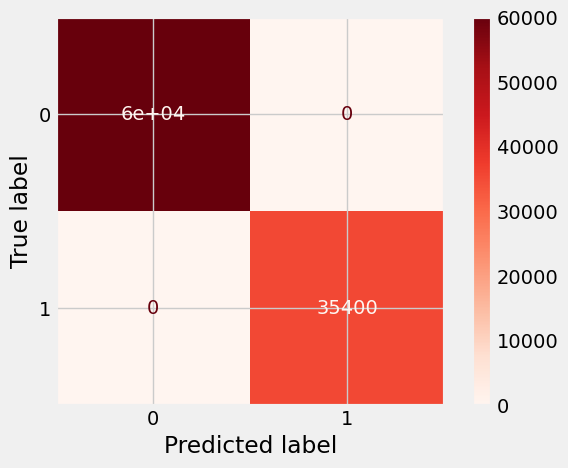

In [238]:
# Check Performance Model against Test-Set
print('F1 Score - Test Set   : ', f1_score(y_train, y_pred_train_tune), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_random_search, X_train, y_train, cmap='Reds'))

F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15058
           1       1.00      1.00      1.00      8820

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878
 

Confusion Matrix      : 


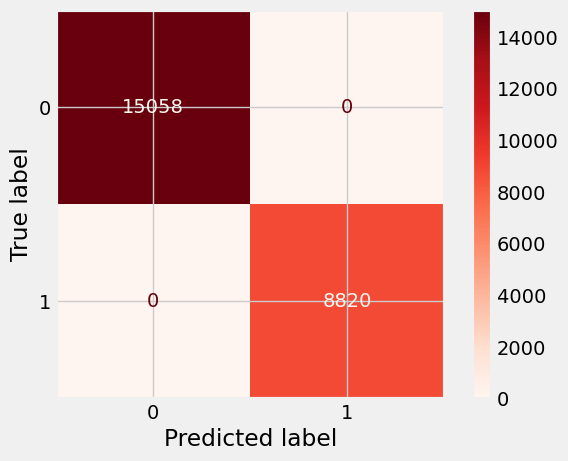

In [239]:
# Check Performance Model against Test-Set
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tune), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_random_search, X_test, y_test, cmap='Reds'))

In [240]:
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train_tune, y_test, y_pred_test_tune, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train_tune),
      'train - recall' : recall_score(y_train, y_pred_train_tune),
      'train - accuracy' : accuracy_score(y_train, y_pred_train_tune),
      'train - f1_score' : f1_score(y_train, y_pred_train_tune),
      'test - precision' : precision_score(y_test, y_pred_test_tune),
      'test - recall' : recall_score(y_test, y_pred_test_tune),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test_tune),
      'test - f1_score' : f1_score(y_test, y_pred_test_tune),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train_tune, y_test, y_pred_test_tune, 'Random Search')
pd.DataFrame(all_reports)

,Random Search
train - precision,1.0
train - recall,1.0
train - accuracy,1.0
train - f1_score,1.0
test - precision,1.0
test - recall,1.0
test - accuracy_score,1.0
test - f1_score,1.0


Nilai ketepatan prediksi dari model Random Forest Classifier baik dengan tuning dan tidak menghasilkan nilai yang sama.

# x. Model Saving

Pada bagian ini akan dilakukan penyimpanan model untuk kebutuhan inference. Model yang disimpan adalah Random Forest.

In [ ]:
#Save the files

import pickle
import json


with open('model.pkl', 'wb') as file_5:
  pickle.dump(rf_pipe, file_5)

# xi. Conclusion

Dari hasil analisa yang telah dilakukan, dapat disimpulkan bahwa :
1. Pelanggan hotel memiliki karakter yang berbeda-beda.
2. Proyek ini telah berhasil untuk memprediksi seseorang apakah ada kemungkinan untuk membatalkan reservasi atau tidak demi meningkatkan retensi pelanggan hotel.
3. Variabel yang berpengaruh terhadap kemungkinan pembatalan (`is_cancelled`) diantaranya `hotel`, `is_canceled`, `arrival_date_year`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, `lead_time`, `stays_in_week_nights`, `adults`, `babies`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, `total_of_special_requests`.
4.  Adapun rekomendasi bisnis yang kami sarankan yaitu :
    - Lakukan analisis data secara berkala untuk memantau tren dan membuat keputusan bisnis yang lebih baik.
    - Gunakan data pelanggan untuk mengetahui karakteristik pelanggan sehingga dapat memberikan penawaran yang lebih personal dan relevan.
    - Optimalkan digital marketing untuk meningkatkan visibilitas dan menarik lebih banyak pelanggan.
5. Dampak dari prediksi pembatalan terhadap strategi pemasaran untuk meningkatkan retensi pelanggan diantaranya :
    - Segmentasi pelanggan yang lebih baik sehingga hotel dapat mengelompokkan pelanggan berdasarkan perilaku mereka. Ini akan berdampak positif dalam pemasaran untuk dapat tepat sasaran dengan melakukan penyesuaian untuk segmen-segmen yang lebih beresiko untuk membatalkan.
    - Jika suatu segmen pelanggan memiliki tingkat pembatalan yang tinggi, hotel dapat menawarkan insentif seperti diskon atau paket khusus untuk mendorong konversi pemesanan. Misalnya, penawaran yang lebih fleksibel atau bonus untuk pemesanan yang dilakukan lebih awal.
    - Data prediksi dapat digunakan untuk memperbaiki pengalaman pelanggan. Dengan mengetahui faktor-faktor yang menyebabkan pembatalan, hotel bisa melakukan perbaikan, seperti meningkatkan komunikasi, memberikan informasi yang jelas, atau menawarkan dukungan tambahan kepada pelanggan yang mungkin mengalami keraguan.    
8. Kelebihan model : Model yang dibuat dapat dikatakan sangat baik dalam memprediksi pelanggan hotel. Dalam kasus ini, model dapat memberikan jawaban yang cukup tepat mengenai apakah seorang pelanggan ada kecenderungan untuk membatalkan hotel.
9. Kelemahan model : Model ini memiliki tingkat akurasi sempurna sehingga ada kemungkinan bahwa model akan overfit pada data baru yang mana dikhawatirkan akan menghasilkan prediksi tidak tepat. Model ini dapat ditingkatkan performansinya dengan perbaikan dalam Feature Engineering agar data dapat dipersiapkan dengan baik sebeum dilakukan prediksi. Dalam kasus ini, penanganan pada Feature Engineering yang kurang baik akan menghasilkan kekeliruan dalam memberikan interpretasi serta rekomendasi kepada Hotel XYZ.
10. Improvement : Demi meningkatkan kualitas model, peneliti diharapkan dapat lebih detail dalam melakukan feature engineering sehingga data yang siap diolah untuk membangun model menjadi lebih baik sehingga dapat dikategorikan sebagai goodfit. Gunakan model prediksi yang lain yang dapat digunakan sehingga lebih banyak memiliki pilihan untuk membentuk model yang lebih representatif.